In [1]:
#Import and settings
import os
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

datadir = 'train'
columns = ['Name','Epoch','TrainEpochLoss','TrainEpochDuration','ValidEpochLoss','ValidEpochDuration','BLEU-1','BLEU-2','BLEU-3','BLEU-4']


In [2]:
#Get subfolders
training = os.listdir(datadir)
training.sort()

TrainDf = pd.DataFrame(columns=columns)

for folder in training:
    fname = os.path.join(datadir, folder, 'stats.csv')
    if os.path.isfile(fname): 
        df = pd.read_csv(fname, header=None,  index_col=False)

        if len(df.columns) == 4:
            df.rename({0: 'TrainEpochLoss', 1: 'TrainEpochDuration', 2: 'ValidEpochLoss', 3: 'ValidEpochDuration'}, inplace=True, axis='columns')
        elif len(df.columns) == 5:
            df.rename({0: 'TrainEpochLoss', 1: 'TrainEpochDuration', 2: 'ValidEpochLoss', 3: 'ValidEpochDuration', 4: 'BLEU-4'}, inplace=True, axis='columns')    
        elif len(df.columns) == 8:
            df.rename({0: 'TrainEpochLoss', 1: 'TrainEpochDuration', 2: 'ValidEpochLoss', 3: 'ValidEpochDuration', 4: 'BLEU-1', 5: 'BLEU-2', 6: 'BLEU-3', 7: 'BLEU-4'}, inplace=True, axis='columns')    
        df['Epoch'] = np.arange(len(df)) +1
        df['Name'] = folder
        TrainDf = pd.concat([TrainDf, df], sort=True)
TrainDf.reset_index(drop=True, inplace=True)
TrainDf['TrainEpochDuration'] /= 60    
TrainDf['ValidEpochDuration'] /= 60 
TrainDf.sort_values(by=['Name','Epoch'], inplace=True)
    

In [3]:
TrainDf.tail(10)

,BLEU-1,BLEU-2,BLEU-3,BLEU-4,Epoch,Name,TrainEpochDuration,TrainEpochLoss,ValidEpochDuration,ValidEpochLoss
40,0.634528,0.486859,0.388327,0.317728,1,T,133.282923,2.513408,66.663134,2.241580
41,0.618123,0.479099,0.385715,0.318239,2,T,143.753350,2.058614,52.414451,2.168080
42,0.635261,0.491234,0.395167,0.325713,3,T,126.008869,1.929535,62.758362,2.141070
43,0.642168,0.497263,0.39996,0.329913,4,T,128.224774,1.856611,62.089043,2.150436
44,0.633926,0.490435,0.394602,0.325688,5,T,128.122486,1.793344,50.009306,2.153230
45,NaN,NaN,NaN,0.301864,1,U,100.603277,2.824131,59.026436,2.340779
46,NaN,NaN,NaN,0.327051,2,U,110.193600,2.157058,53.978534,2.182610
47,NaN,NaN,NaN,0.323557,3,U,121.665207,2.006251,62.392861,2.145884
48,NaN,NaN,NaN,0.332963,4,U,125.296699,1.918787,68.939625,2.118022
49,NaN,NaN,NaN,0.334002,5,U,140.741985,1.848531,69.709275,2.112572


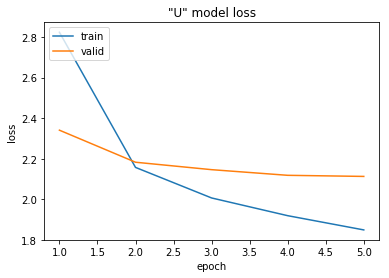

In [12]:
model = 'U'

p = TrainDf.loc[TrainDf['Name'] == model]
p = p.set_index('Epoch')

plt.plot(p['TrainEpochLoss'])
plt.plot(p['ValidEpochLoss'])
plt.title('"' + model + '" model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

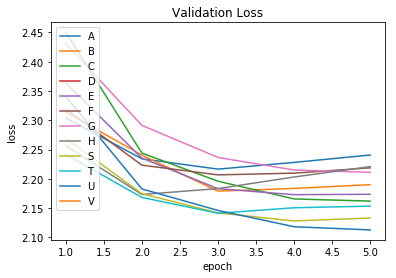

In [13]:
for folder in training:
    p = TrainDf.loc[TrainDf['Name'] == folder]
    p = p.set_index('Epoch')
    plt.plot(p['ValidEpochLoss'])

plt.title('Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(training, loc='upper left')
plt.show()

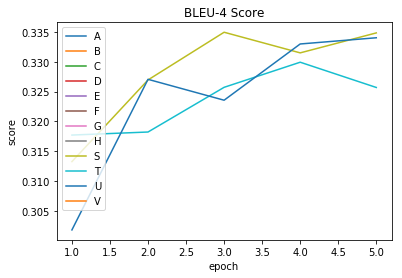

In [14]:
for folder in training:
    p = TrainDf.loc[TrainDf['Name'] == folder]
    p = p.set_index('Epoch')
    plt.plot(p['BLEU-4'])

plt.title('BLEU-4 Score')
plt.ylabel('score')
plt.xlabel('epoch')
plt.legend(training, loc='upper left')
plt.show()